In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as plt
import stock_utils as su
import pylab as pl
import os.path
%matplotlib inline

In [2]:
# We will look at stock prices over the past year, starting at January 1, 2010
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2017, 11, 30)
end_date = datetime.date.today()

tickers = ['AAPL', 'XOM']

In [3]:
if not os.path.exists('data'):
    su.get_quandl_data(tickers, start_date, end_date)

Creating folder data
https://www.quandl.com/api/v3/datasets/WIKI/AAPL/data.csv?start_date=2010-01-01&end_date=2017-12-03&api_key=ez-ADzG6c-RPCxB2uzLs
Saving to data/AAPL.csv
https://www.quandl.com/api/v3/datasets/WIKI/XOM/data.csv?start_date=2010-01-01&end_date=2017-12-03&api_key=ez-ADzG6c-RPCxB2uzLs
Saving to data/XOM.csv


In [4]:
data_frame = pd.read_csv(su.symbol_to_path(tickers[0]),
      index_col = 'Date',
      parse_dates = True,
      na_values = ['NaN'])
data_frame.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-12-01,169.95,171.67,168.50,171.05,39590080.0,0.0,1.0,169.95,171.67,168.50,171.05,39590080.0
2017-11-30,170.43,172.14,168.44,171.85,40172368.0,0.0,1.0,170.43,172.14,168.44,171.85,40172368.0
2017-11-29,172.63,172.92,167.16,169.48,40788324.0,0.0,1.0,172.63,172.92,167.16,169.48,40788324.0
2017-11-28,174.30,174.87,171.86,173.07,25468442.0,0.0,1.0,174.30,174.87,171.86,173.07,25468442.0
2017-11-27,175.05,175.08,173.34,174.09,20536313.0,0.0,1.0,175.05,175.08,173.34,174.09,20536313.0


In [5]:
data_frame.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03
mean,294.078425,296.695056,291.090351,293.957477,2.803280e+07,0.015296,1.003012,82.903302,83.601684,82.141751,82.893971,8.643857e+07
std,182.093666,183.707315,180.146526,181.932008,1.927449e+07,0.190789,0.134433,35.864529,36.079584,35.640401,35.876275,6.071041e+07
min,90.000000,90.700000,89.470000,90.280000,5.624800e+06,0.000000,1.000000,24.722226,25.188732,24.449777,24.681102,1.147592e+07
25%,117.640000,118.750000,116.757500,117.725000,1.445248e+07,0.000000,1.000000,52.050394,52.594329,51.598989,52.061812,4.009638e+07
50%,255.282500,258.400000,250.135000,254.105000,2.238113e+07,0.000000,1.000000,77.480410,78.350450,76.880250,77.763784,7.112851e+07
75%,449.915000,454.462500,443.715000,449.416250,3.588787e+07,0.000000,1.000000,108.470970,109.849709,107.540881,108.844566,1.140447e+08
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08,3.290000,7.000000,175.110000,176.095000,174.645900,175.880000,4.702495e+08


## Ticker price for a single stock for the period

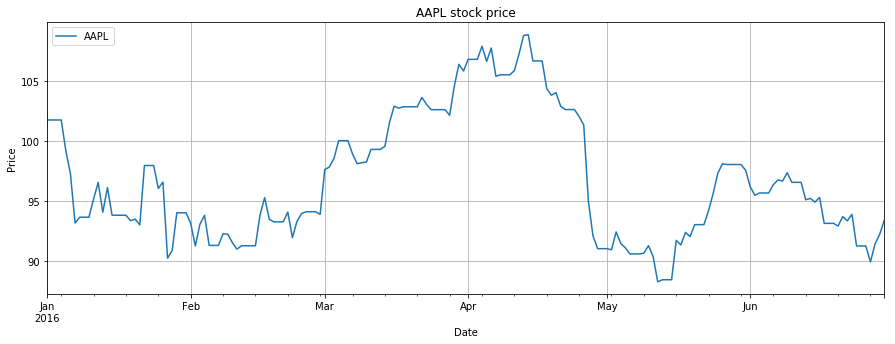

In [6]:
start_date = '2016-01-01'
end_date = '2016-06-30'

data_frame = su.get_data_frame(tickers[0], start_date, end_date, dropna=True)
ax = data_frame.plot(figsize=(15,5), grid=True, title='{0} stock price'.format(tickers[0]))

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Rolling mean and Bollinger bands

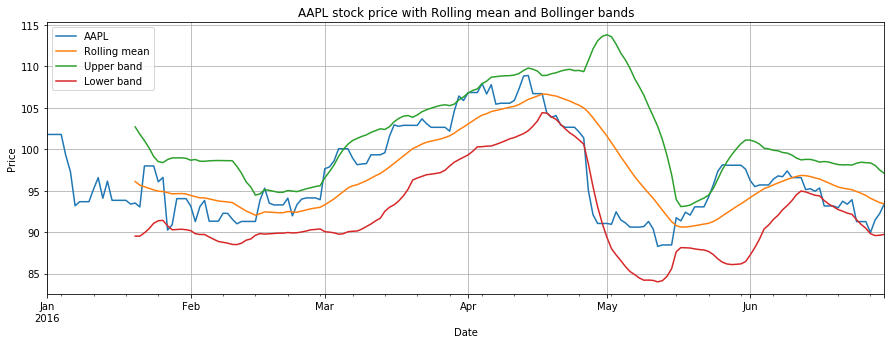

In [7]:
data_frame = su.get_data_frame(tickers[0], start_date, end_date, dropna=True)
ax = data_frame.plot(label=tickers[0])

#Calculate rolling mean and rolling std for a period of 20 days
window_size = 20

rolling_mean = su.get_rolling_mean(data_frame, window=window_size)
rolling_std = su.get_rolling_std(data_frame, window=window_size)

#Calculate Bollinger bands
upper_band, lower_band = su.get_bollinger_bands(rolling_mean, rolling_std)

# rename the columns so they are labeled properly on the plot
upper_band = upper_band.rename(columns = {upper_band.columns[0] : 'Upper band'})
lower_band = lower_band.rename(columns = {lower_band.columns[0] : 'Lower band'})
rolling_mean = rolling_mean.rename(columns = {rolling_mean.columns[0] : 'Rolling mean'})

rolling_mean.plot(ax=ax, label='Rolling mean')
upper_band.plot(label='Upper band', ax=ax)
lower_band.plot(label='Lower band', ax=ax, figsize=(15, 5), grid=True)

ax.set_title('{0} stock price with Rolling mean and Bollinger bands'.format(tickers[0]))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Plotting prices for selected stocks

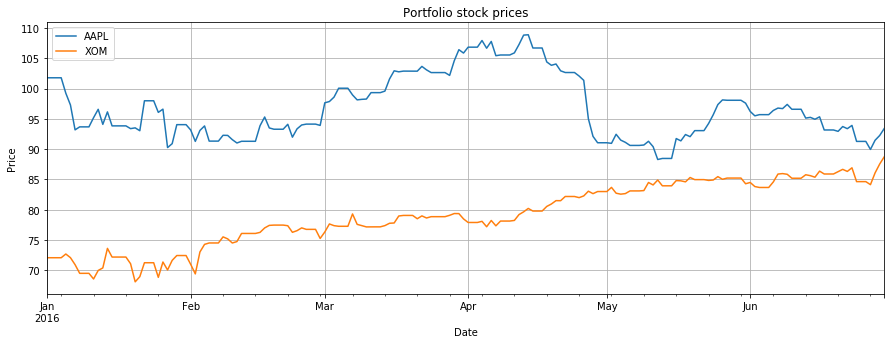

In [8]:
data_frame = su.get_data_frame_for_symbols(tickers, start_date, end_date, include_spy=True)

ax = data_frame.plot(figsize=(15,5), grid=True, title='Portfolio stock prices')

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Normalized prices for selected stocks

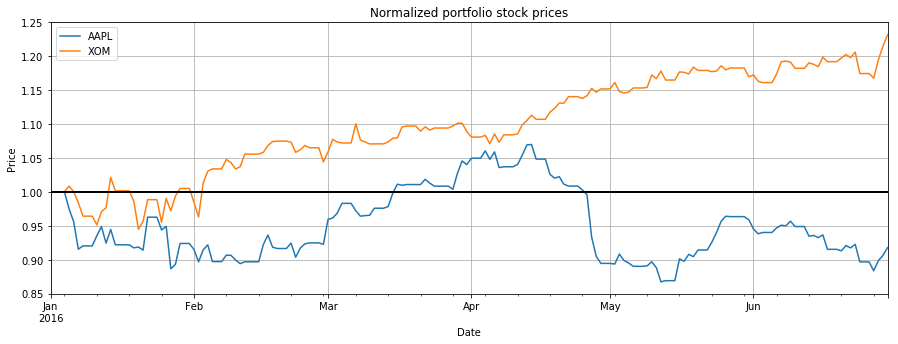

In [9]:
data_frame = su.get_data_frame_for_symbols(tickers, start_date, end_date, include_spy=True)

data_frame = su.normalize_data(data_frame)
ax = data_frame.plot(figsize=(15,5), grid=True, title='Normalized portfolio stock prices')

ax.axhline(y=1, color='black', lw=2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Daily returns for selected stocks

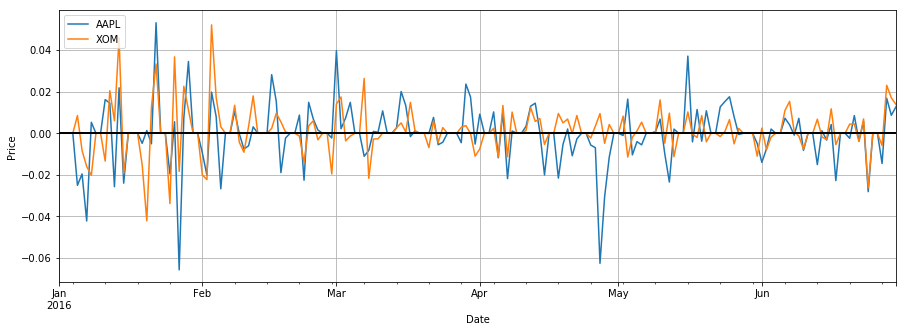

In [10]:
data_frame = su.get_data_frame_for_symbols(tickers, start_date, end_date, include_spy=True)

daily_returns = su.compute_daily_returns(data_frame)
ax = daily_returns.plot(figsize=(15,5), grid = True)

ax.axhline(y = 0, color = 'black', lw = 2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Cummulative returns (in percentage) at the end of the period for selected stocks

In [11]:
data_frame = su.get_data_frame_for_symbols(tickers, start_date, end_date, include_spy=True)
cummulative_returns = su.compute_cummulative_returns(data_frame, data_frame.shape[0] - 1)
print(cummulative_returns.ix[-1, :])

AAPL   -0.082086
XOM     0.231518
Name: 2016-06-30 00:00:00, dtype: float64
